# Demonstration of Anderson localization
This notebook is intended to show a very basic example of the Anderson localization in one-dimensional system. 

In [38]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

# from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline

To show the idea of Anderson localization, we can consider 1D chain of $N$ atoms with periodic boundary conditions similar to what we did in previous notebooks. One can think of this system as a ring formed by $N$ atoms.
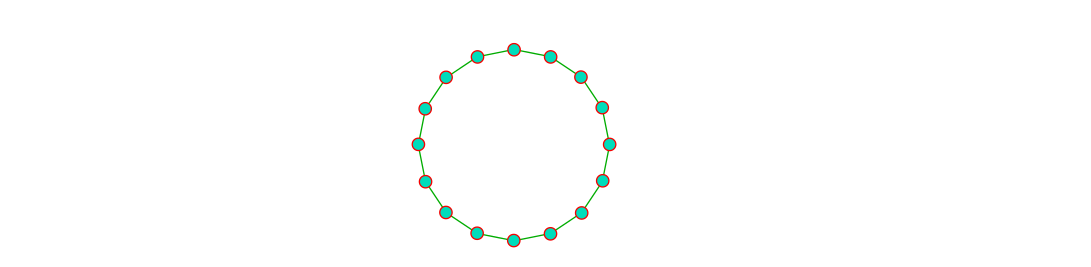  
The Hamiltonian with nearest-neighbour hopping integrals $t$ writes:$$\left[\begin{array}{ccllcc}
0 & t & & & & t\\
t & 0 & t\\
 & t & 0 & t\\
 &  & t & \text{……}\\
 &  &  &  & 0 & t\\
t &  &  &  & t & 0
\end{array}\right]$$

The disorder is introduced as random on-site potentionals ${d_i}$. The Hamiltonian then becomes:
$$\left[\begin{array}{ccllcc}
d_{1} & t  & & & & t\\
t & d_{2} & t\\
 & t & d_{3} & t\\
 &  & t & \text{……}\\
 &  &  &  & d_{N-1} & t\\
t &  &  &  & t & d_{N}
\end{array}\right]$$

The localization phenomenon can be addressed by studying the eigenstates of the system. Quantitavely, one can use the inverse partipicapation ratio (IPR) defined as $$IPR=\frac{1}{\Sigma p_i ^2}=\frac{1}{\Sigma |\psi _i |^4}$$ to depict the localazation of a given
eigenstate. For a state that is fully delocalized over $N$ atoms IPR = $N$, while for the fully localized state IPR = $1$. 

In the plots, the IPR of different eigenstates and the probability density of the $n$th wavefunction are presented.

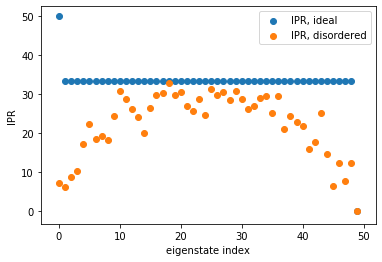

interactive(children=(IntSlider(value=24, description='n', max=49), Output()), _dom_classes=('widget-interact'…

<function __main__.show_eigvecs(n)>

In [39]:
def IPR(vector):
    #vector=vector/np.sum(abs(vector)**2);
    v1=abs(vector)**2;
    v1=v1**2;
    ipr=1.0/np.sum(v1)
    return(ipr)
def buildham(t,nq):
    nq=nq-1
    y=np.ones(nq)
    mat1=np.diag(y,-1)*t+np.diag(y,1)*t
    mat1[nq,0]=t
    mat1[0,nq]=t 
    #mat=np.kron(part1,mat1)+np.kron(part2,mat2)
    #print(mat)
    return(mat1)
ndim=50
strength=1.0
nr=np.arange(0,ndim,1)
H0=buildham(-1.0,ndim)
disorder=strength*(np.random.rand(ndim)-0.5);
H1=H0+np.diag(disorder)
[eigval0,eigvec0]=np.linalg.eigh(H0)
[eigval1,eigvec1]=np.linalg.eigh(H1)
#plt.scatter(nr,eigvec0[2,:])
#plt.scatter(disorder,d1)
#print(ndim)
ipa1=np.zeros(ndim)
ipa0=np.zeros(ndim)
for i in range(0,ndim-1):
    ipa1[i]=IPR(eigvec1[:,i])
    ipa0[i]=IPR(eigvec0[:,i])
plt.xlabel('eigenstate index')
plt.ylabel('IPR')
plt.scatter(nr,ipa0)
plt.scatter(nr,ipa1)
plt.legend(['IPR, ideal','IPR, disordered'])

def show_eigvecs(n):
    plt.xlabel('atom index')
    plt.ylabel('probability density')
    plt.plot(abs(eigvec0[:,n-1])**2)
    plt.plot(abs(eigvec1[:,n-1])**2)
    plt.legend(['WF, ideal','WF, disordered'])
interact(show_eigvecs,n=(0,ndim-1))

# Questions

- Investigated the dependence of localization on the eigenstate index, disorder strength (width of the distribution of $d_i$) and system size $N$?
- Why is the IPN = $N$ achived only for the first (and in case of even $N$ the last) eigenstate of the ideal system? 
- What is the effect of disorder on eigenvalues?